# Haberman Surgery

In [74]:
import math
import random

import matplotlib as mpl
import matplotlib.animation
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing


In [92]:
column_names = [
    "age_of_patient", "year_of_operation", "axillary_nodes_detected", "survival_status"
]
target_name = "survival_status"

df = pd.read_csv("haberman.data", names=column_names)

In [93]:
def separar_dataframe(dataframe):
    return (dataframe.iloc[:,-1], dataframe.iloc[:,:-1])

In [124]:
target_data, fields_data = separar_dataframe(df)

haberman_dataframe = pd.DataFrame(fields_data, columns=column_names[:-1])

In [95]:
haberman_dataframe.head(10)

,age_of_patient,year_of_operation,axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
5,33,58,10
6,33,60,0
7,34,59,0
8,34,66,9
9,34,58,30


## Explorando la data

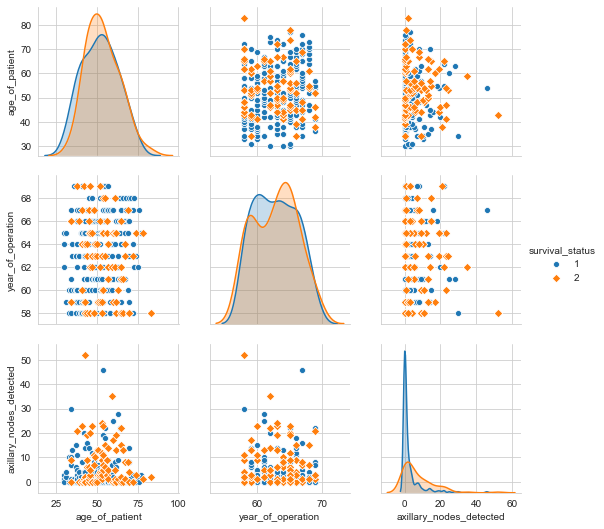

In [96]:
sns.set_style('whitegrid')
sns.pairplot(data=df, hue=target_name, markers=["o", "D"], vars=column_names[:-1])

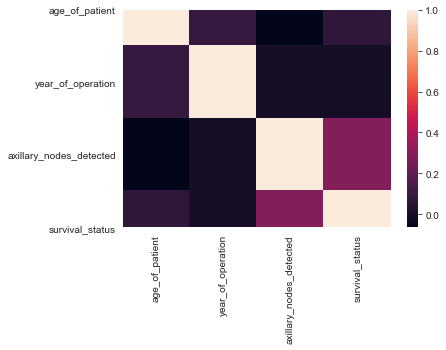

In [97]:
corr = df.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'With Outlier')

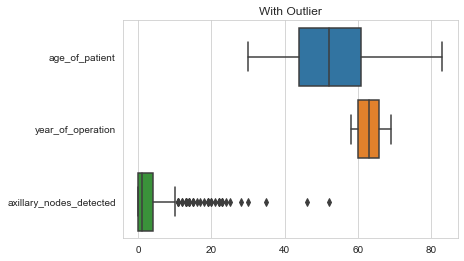

In [98]:
sns.boxplot(data=fields_data, orient='h').set_title("With Outlier")

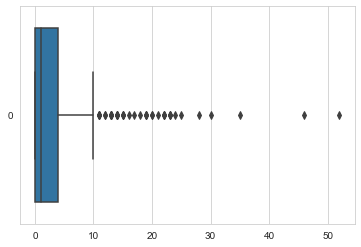

In [99]:
sns.boxplot(data=csv['axillary_nodes_detected'], orient='h')

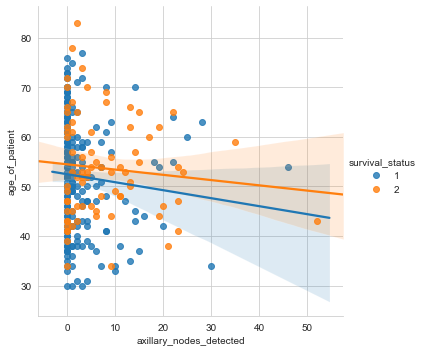

In [100]:
sns.lmplot(x="axillary_nodes_detected", y="age_of_patient", data=df, hue=target_name, fit_reg=True)

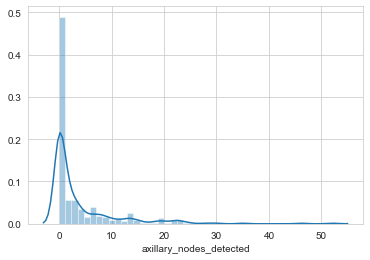

In [104]:
sns.distplot(df['axillary_nodes_detected'])

## Procesando Outliers

### Sólo los que están dentro de los primeros tres quartiles para el atributo `axillary_nodes_detected`

In [105]:
df['axillary_nodes_detected'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axillary_nodes_detected, dtype: float64

In [109]:
df_ol = df[df.axillary_nodes_detected <= 4]
df_ol.shape

(230, 4)

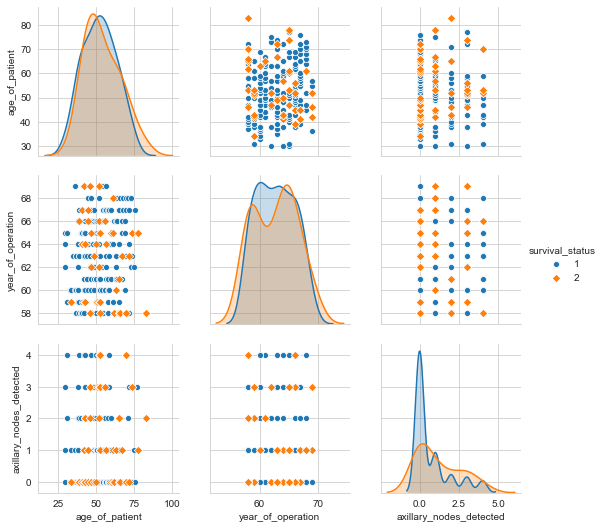

In [108]:
sns.pairplot(data=df_ol, hue=target_name, markers=["o", "D"], vars=column_names[:-1])

Text(0.5, 1.0, 'Without Outlier')

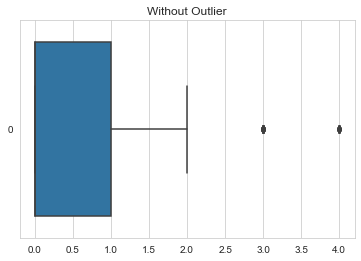

In [110]:
sns.boxplot(data=df_ol['axillary_nodes_detected'], orient='h').set_title('Without Outlier')

### Solo los primero quartiles para el dataframe completo

In [106]:
z_score = np.abs(stats.zscore(df))
z_score

array([[2.08214014, 0.35358406, 0.42159203, 0.6       ],
       [2.08214014, 0.26292148, 0.14295885, 0.6       ],
       [2.08214014, 0.66183684, 0.56090862, 0.6       ],
       ...,
       [2.2754471 , 0.66183684, 0.14295885, 0.6       ],
       [2.36816172, 0.66183684, 0.42159203, 1.66666667],
       [2.83173483, 1.49593258, 0.28227544, 1.66666667]])

In [77]:
threshold = 3
print(np.where(z_score > threshold))

(array([  9,  62, 174, 215, 252], dtype=int64), array([2, 2, 2, 2, 2], dtype=int64))


In [112]:
df_z = df[(z_score < 3).all(axis=1)]
df_z.shape

(301, 4)

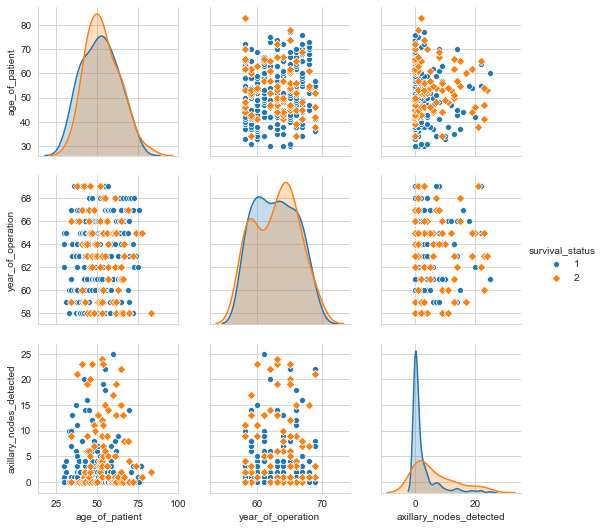

In [113]:
sns.pairplot(data=df_z, hue=target_name, markers=["o", "D"], vars=column_names[:-1])

In [114]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr

age_of_patient             16.75
year_of_operation           5.75
axillary_nodes_detected     4.00
survival_status             1.00
dtype: float64

In [116]:
df_qol = csv[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
df_qol.shape

(266, 4)

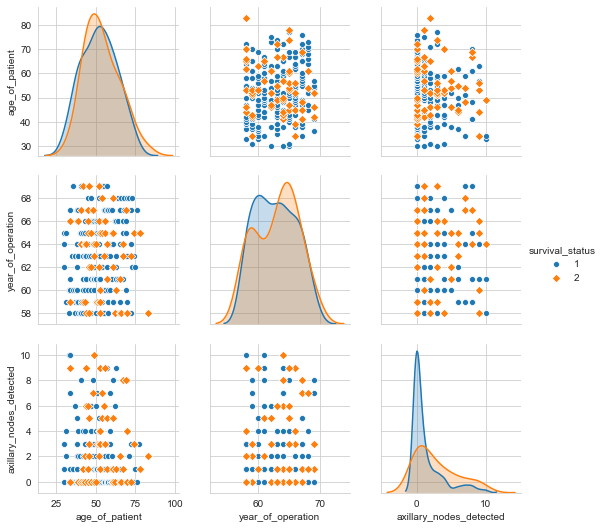

In [117]:
sns.pairplot(data=df_qol, hue=target_name, markers=["o", "D"], vars=column_names[:-1])

Text(0.5, 1.0, 'Without Outlier')

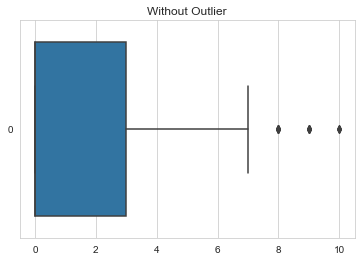

In [118]:
sns.boxplot(data=df_qol['axillary_nodes_detected'], orient='h').set_title('Without Outlier')

## Inicio del Entrenamiento

In [126]:
X_train, X_test, y_train, y_test = train_test_split(fields_data, target_data, stratify=target_data)

In [10]:


def print_rendimiento(entrenamiento, prueba, total):
    print("Rendimiento en el conjunto de entrenamiento: ", entrenamiento)
    print("Rendimiento en el conjunto de prueba: ", prueba)
    print("Rendimiento en el conjunto total: ", total)


def generar_modelo(solver="lbfgs", f_activation="logistic", capas=(20,), aprendizaje=0.0001, batch="auto", max_iter=200):
    mlp_modelo = MLPClassifier(
        solver=solver, random_state=0, hidden_layer_sizes=capas, activation=f_activation, alpha=aprendizaje, batch_size=batch, max_iter=max_iter)
    mlp_modelo.fit(X_train, y_train)
    print_rendimiento(
        mlp_modelo.score(X_train, y_train),
        mlp_modelo.score(X_test, y_test),
        mlp_modelo.score(fields_data, target_data)
    )
    return mlp_modelo



In [11]:
def neuronas_capa_oculta(neuronas_entrada: int, neuronas_salida: int):
    return math.pow(neuronas_entrada * neuronas_salida, 1/2)

In [12]:
possibles_salidas = 2
neuronas_ocultas = neuronas_capa_oculta(len(column_names) - 1, possibles_salidas)
print(neuronas_ocultas)

2.449489742783178


## Utilizando distinto Número de Capas y Neuronas

In [14]:
generar_modelo()

Rendimiento en el conjunto de entrenamiento:  0.7641921397379913
Rendimiento en el conjunto de prueba:  0.5844155844155844
Rendimiento en el conjunto total:  0.7189542483660131


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
generar_modelo(capas=(2))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
generar_modelo(capas=(5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
generar_modelo(capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.7991266375545851
Rendimiento en el conjunto de prueba:  0.7272727272727273
Rendimiento en el conjunto total:  0.7810457516339869


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
generar_modelo(capas=(10,5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
generar_modelo(capas=(5,5))

Rendimiento en el conjunto de entrenamiento:  0.7292576419213974
Rendimiento en el conjunto de prueba:  0.5584415584415584
Rendimiento en el conjunto total:  0.6862745098039216


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
generar_modelo(capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.777292576419214
Rendimiento en el conjunto de prueba:  0.5844155844155844
Rendimiento en el conjunto total:  0.7287581699346405


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
generar_modelo(capas=(8,5))

Rendimiento en el conjunto de entrenamiento:  0.7991266375545851
Rendimiento en el conjunto de prueba:  0.7142857142857143
Rendimiento en el conjunto total:  0.7777777777777778


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Utilizando distinta Función de Activación

In [22]:
generar_modelo(f_activation="tanh")

Rendimiento en el conjunto de entrenamiento:  0.7467248908296943
Rendimiento en el conjunto de prueba:  0.7272727272727273
Rendimiento en el conjunto total:  0.7418300653594772


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
generar_modelo(f_activation="relu", capas=(5, 5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
generar_modelo(f_activation="tanh", capas=(5,5))

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.5974025974025974
Rendimiento en el conjunto total:  0.7254901960784313


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
generar_modelo(f_activation="tanh", capas=(20))

Rendimiento en el conjunto de entrenamiento:  0.7467248908296943
Rendimiento en el conjunto de prueba:  0.7272727272727273
Rendimiento en el conjunto total:  0.7418300653594772


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
generar_modelo(f_activation="identity")

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
generar_modelo(f_activation="identity", capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.7142857142857143
Rendimiento en el conjunto total:  0.7581699346405228


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Utilizando distinto Optimizador de Capas

In [28]:
generar_modelo(solver="adam", capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
generar_modelo(solver="adam", capas=(2), max_iter=1000)

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [340]:
generar_modelo(solver="sgd", capas=(2))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Utilizando distinto factor de aprendizaje y de tamaño de Batch

In [342]:
generar_modelo(aprendizaje=0.01, capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.759825327510917
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7712418300653595


MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [343]:
generar_modelo(aprendizaje=0.05, capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7745098039215687


MLPClassifier(activation='logistic', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [346]:
generar_modelo(aprendizaje=0.07, capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.7662337662337663
Rendimiento en el conjunto total:  0.7679738562091504


MLPClassifier(activation='logistic', alpha=0.07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [348]:
generar_modelo(aprendizaje=0.01, capas=(8,2), batch=50)

Rendimiento en el conjunto de entrenamiento:  0.759825327510917
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7712418300653595


MLPClassifier(activation='logistic', alpha=0.01, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [349]:
generar_modelo(aprendizaje=0.01, capas=(8,2), batch=75)

Rendimiento en el conjunto de entrenamiento:  0.759825327510917
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7712418300653595


MLPClassifier(activation='logistic', alpha=0.01, batch_size=75, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [357]:
generar_modelo(aprendizaje=0.01, capas=(10), batch=100)

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7777777777777778


MLPClassifier(activation='logistic', alpha=0.01, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [358]:
generar_modelo(capas=(10), batch=100)

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7777777777777778


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [361]:
generar_modelo(capas=(8,2), batch=50)

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7810457516339869


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7777777777777778


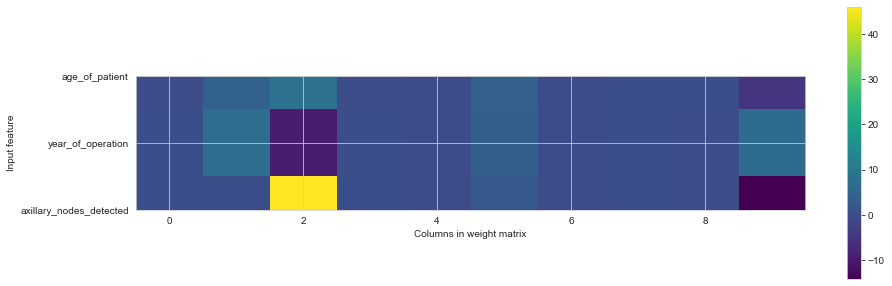

In [293]:
modelo_salida = generar_modelo(capas=(10))

plt.figure(figsize=(15, 5))
plt.imshow(modelo_salida.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(3), column_names[:-1])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Entrenamiendo sin Outliers para `axillary_nodules_detected`

In [136]:
target_data, fields_data = separar_dataframe(df_ol)

pd.DataFrame(fields_data, columns=column_names[:-1])

,age_of_patient,year_of_operation,axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


In [137]:
X_train, X_test, y_train, y_test = train_test_split(fields_data, target_data, stratify=target_data)

In [138]:
generar_modelo()

Rendimiento en el conjunto de entrenamiento:  0.8197674418604651
Rendimiento en el conjunto de prueba:  0.8103448275862069
Rendimiento en el conjunto total:  0.8173913043478261


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
generar_modelo(capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.8197674418604651
Rendimiento en el conjunto de prueba:  0.8103448275862069
Rendimiento en el conjunto total:  0.8173913043478261


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [139]:
generar_modelo(capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.8255813953488372
Rendimiento en el conjunto de prueba:  0.7931034482758621
Rendimiento en el conjunto total:  0.8173913043478261


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [141]:
generar_modelo(aprendizaje=0.01, capas=(8,2), batch=75)

Rendimiento en el conjunto de entrenamiento:  0.8197674418604651
Rendimiento en el conjunto de prueba:  0.8103448275862069
Rendimiento en el conjunto total:  0.8173913043478261


MLPClassifier(activation='logistic', alpha=0.01, batch_size=75, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Entrenamiento sin Outliers del último quartil en el dataframe

In [147]:
target_data, fields_data = separar_dataframe(df_qol)

pd.DataFrame(fields_data, columns=column_names[:-1])

,age_of_patient,year_of_operation,axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


In [148]:
X_train, X_test, y_train, y_test = train_test_split(fields_data, target_data, stratify=target_data)

In [149]:
generar_modelo()

Rendimiento en el conjunto de entrenamiento:  0.7839195979899497
Rendimiento en el conjunto de prueba:  0.7761194029850746
Rendimiento en el conjunto total:  0.7819548872180451


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [150]:
generar_modelo(capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.7889447236180904
Rendimiento en el conjunto de prueba:  0.7761194029850746
Rendimiento en el conjunto total:  0.7857142857142857


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
generar_modelo(capas=(8,5))

Rendimiento en el conjunto de entrenamiento:  0.8040201005025126
Rendimiento en el conjunto de prueba:  0.746268656716418
Rendimiento en el conjunto total:  0.7894736842105263


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Entrenamiendo sin Outliers a partir de `z score`

In [142]:
target_data, fields_data = separar_dataframe(df_z)

pd.DataFrame(fields_data, columns=column_names[:-1])

,age_of_patient,year_of_operation,axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


In [143]:
X_train, X_test, y_train, y_test = train_test_split(fields_data, target_data, stratify=target_data)

In [144]:
generar_modelo()

Rendimiento en el conjunto de entrenamiento:  0.7733333333333333
Rendimiento en el conjunto de prueba:  0.7763157894736842
Rendimiento en el conjunto total:  0.7740863787375415


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [145]:
generar_modelo(capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.7688888888888888
Rendimiento en el conjunto de prueba:  0.7894736842105263
Rendimiento en el conjunto total:  0.7740863787375415


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [146]:
generar_modelo(capas=(8,5))

Rendimiento en el conjunto de entrenamiento:  0.7377777777777778
Rendimiento en el conjunto de prueba:  0.7368421052631579
Rendimiento en el conjunto total:  0.7375415282392026


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)